Mapping US Populations using Geopandas, by Yotam Voskoboynik

Goal: Map the US state populations from 2010-2018, and placement of US natural parks on a map

Much of this tutorial uses code from 
http://geopandas.org/ (for reading, and merging segments)
and 
https://pythonawesome.com/bokeh-plotting-backend-for-pandas-and-geopandas/ (primarily in regard to the graphs at the end)
but I used different datasets and splitoff and some points

Required dependencies:

Numpy,
Pandas,
RTree,
GDAL
Fiona (interface to GDAL),
Shapely (interface to GEOS),
pyproj (interface to PROJ),
six,
GeoPandas

These should be installed in the order they are shown 


geopandas has three basic classes of geometric objects (which are actually shapely objects):

Points / Multi-Points
Lines / Multi-Lines
Polygons / Multi-Polygons

A GeoDataFrame is a tabular data structure that contains a GeoSeries.
The most important property of a GeoDataFrame is that it always has one GeoSeries column that holds a special status. This GeoSeries is referred to as the GeoDataFrame’s “geometry”. When a spatial method is applied to a GeoDataFrame (or a spatial attribute like area is called), this commands will always act on the “geometry” column.

For Geopandas:

pip install Numpy
pip install Pandas
pip install RTree
pip install GDAL
pip install Fiona
pip install Shapely
pip install pyproj
pip install six
pip install GeoPandas

For the graphing in this tutorial:
pip install pandas_bokeh


In [1]:
#import requests
import geopandas as gpd
import pandas as pd
import pandas_bokeh
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
pandas_bokeh.output_notebook()


#geojson = requests.get(r"https://raw.githubusercontent.com/PatrikHlobil/Pandas-Bokeh/master/Documentation/Testdata/states/states.geojson").text
#with open("states.geojson", "w") as f:
#    f.write(geojson)

# here we get file from the web
states = gpd.read_file("https://raw.githubusercontent.com/PatrikHlobil/Pandas-Bokeh/master/Documentation/Testdata/states/states.geojson")
    
states

Loading BokehJS ...

STATE_NAME  REGION  POPESTIMATE2010  POPESTIMATE2011  \
0                 Hawaii       4          1363817          1378323   
1             Washington       4          6741386          6819155   
2                Montana       4           990507           996866   
3                  Maine       1          1327568          1327968   
4           North Dakota       2           674518           684830   
5           South Dakota       2           816227           823338   
6                Wyoming       4           564376           567602   
7              Wisconsin       2          5690403          5705812   
8                  Idaho       4          1570912          1583180   
9                Vermont       1           625842           626210   
10             Minnesota       2          5310711          5345967   
11                Oregon       4          3837073          3865845   
12         New Hampshire       1          1316700          1318345   
13                  Iowa       2          3050223          3063690   
14         Massachusetts       1          6564943          6612178   
15              Nebraska       2          1829956          1841641   
16              New York       1         19405185         19526372   
17          Pennsylvania       1         12711063         12742811   
18           Connecticut       1          3580171          3591927   
19          Rhode Island       1          1053169          1052154   
20            New Jersey       1          8803708          8844694   
21               Indiana       2          6490029          6515358   
22                Nevada       4          2702797          2718170   
23                  Utah       4          2775260          2815430   
24            California       4         37327690         37672654   
25                  Ohio       2         11539282         11543332   
26              Illinois       2         12841196         12862298   
27  District of Columbia       3           605040           620336   
28              Delaware       3           899712           907884   
29         West Virginia       3          1854315          1854891   
30              Maryland       3          5788099          5843115   
31              Colorado       4          5048029          5116411   
32              Kentucky       3          4347948          4368505   
33                Kansas       2          2858403          2868756   
34              Virginia       3          8025206          8107548   
35              Missouri       2          5995681          6010280   
36               Arizona       4          6407002          6465488   
37              Oklahoma       3          3759529          3785232   
38        North Carolina       3          9574247          9662940   
39             Tennessee       3          6355882          6396281   
40                 Texas       3         25241648         25644424   
41            New Mexico       4          2064607          2077744   
42               Alabama       3          4785579          4798649   
43           Mississippi       3          2970437          2977452   
44               Georgia       3          9712696          9810595   
45        South Carolina       3          4635834          4672744   
46              Arkansas       3          2921737          2938640   
47             Louisiana       3          4544871          4574388   
48               Florida       3         18846461         19097369   
49              Michigan       2          9876731          9876199   

    POPESTIMATE2012  POPESTIMATE2013  POPESTIMATE2014  POPESTIMATE2015  \
0           1392772          1408038          1417710          1426320   
1           6890899          6963410          7046931          7152818   
2           1003522          1011921          1019931          1028317   
3           1328101          1327975          1328903          1327787   
4            701380           722908           738658           754859   

geopandas can read almost any vector-based spatial data format including ESRI, shapefile, GeoJSON files and more using the command:
geopandas.read_file()

which returns a GeoDataFrame object. 

Any arguments passed to read_file() after the file name will be passed directly to fiona.open, which does the actual data importation. In general, read_file is pretty smart and should do what you want without extra arguments.

Among other things, one can explicitly set the driver (shapefile, GeoJSON) with the driver keyword, or pick a single layer from a multi-layered file with the layer keyword:

Where supported in fiona, geopandas can also load resources directly from a web URL.

In [2]:
# here we use .read_file to get data from a shapefile
# different parks were stored on different files to get all of them we need to concat them all together
parks_area = gpd.read_file('parks_and_protected_lands_area.shp')
parks_line = gpd.read_file('parks_and_protected_lands_line.shp')
parks_point = gpd.read_file('parks_and_protected_lands_point.shp')
parks_scale = gpd.read_file('parks_and_protected_lands_scale_rank.shp')

#Join all of them together
parks = pd.concat([parks_area, parks_line,parks_point,parks_scale], sort=True, ignore_index=True)

parks

featurecla                                           geometry  \
0    National Park Service  POLYGON ((-155.0587158203125 19.366943359375, ...   
1    National Park Service  POLYGON ((-80.6270751953125 28.65087890625, -8...   
2    National Park Service  POLYGON ((-118.4315592447917 34.1336669921875,...   
3    National Park Service  (POLYGON ((-119.0289639469999 33.4839378140001...   
4    National Park Service  POLYGON ((-122.7147623697917 37.95817057291667...   
5    National Park Service  POLYGON ((-123.864013671875 41.15010579427084,...   
6    National Park Service  (POLYGON ((-124.3284912109374 47.5685628255209...   
7    National Park Service  (POLYGON ((-115.7032063802083 35.48095703125, ...   
8    National Park Service  POLYGON ((-115.5004069010417 33.72322591145834...   
9    National Park Service  (POLYGON ((-102.8245442708333 43.482421875, -1...   
10   National Park Service  POLYGON ((-113.0135091145833 37.17106119791667...   
11   National Park Service  POLYGON ((-109.8602294921875 35.171875, -109.6...   
12   National Park Service  POLYGON ((-110.7970377604167 44.08601888020834...   
13   National Park Service  POLYGON ((-142.3490804036458 64.99515787760417...   
14   National Park Service  POLYGON ((-155.6526692708333 68.0228271484375,...   
15   National Park Service  POLYGON ((-157.8594563802083 67.424072265625, ...   
16   National Park Service  POLYGON ((-118.9144287109375 36.61092122395834...   
17   National Park Service  (POLYGON ((-118.880615234375 36.62540690104167...   
18   National Park Service  POLYGON ((-111.096435546875 44.48685709635417,...   
19   National Park Service  POLYGON ((-121.2612711588542 40.42569986979167...   
20   National Park Service  (POLYGON ((-106.1709798177083 32.7719319661458...   
21   National Park Service  POLYGON ((-113.0859375 31.96337890625, -113.08...   
22   National Park Service  POLYGON ((-105.5335286458333 37.95332845052084...   
23   National Park Service  POLYGON ((-119.5421956380208 38.1513671875, -1...   
24   National Park Service  POLYGON ((-78.43863932291667 38.43623860677084...   
25   National Park Service  POLYGON ((-121.3771565755208 48.63484700520834...   
26   National Park Service  POLYGON ((-105.5335286458333 40.3001708984375,...   
27   National Park Service  (POLYGON ((-121.3343098958333 48.9925130208333...   
28   National Park Service  POLYGON ((-121.6234537760417 46.7274169921875,...   
29   National Park Service  POLYGON ((-120.8556315104167 48.3692626953125,...   
..                     ...                                                ...   
485  National Park Service  POLYGON ((-80.48453776041667 25.11564127604167...   
486  National Park Service  POLYGON ((-80.67915852864584 25.11612955729167...   
487  National Park Service  POLYGON ((-80.645751953125 25.0970458984375, -...   
488  National Park Service  POLYGON ((-80.66585286458334 25.09578450520834...   
489  National Park Service  POLYGON ((-80.64404296875 25.08451334635417, -...   
490  National Park Service  POLYGON ((-80.75301106770834 25.02791341145834...   
491  National Park Service  POLYGON ((-80.86747233072917 25.03458658854167...   
492  National Park Service  POLYGON ((-80.7320556640625 25.00191243489584,...   
493  National Park Service  POLYGON ((-80.7835693359375 24.93733723958334,...   
494  National Park Service  POLYGON ((-81.462158203125 25.87451171875, -81...   
495  National Park Service  POLYGON ((-81.473876953125 25.84041341145834, ...   
496  National Park Service  POLYGON ((-85.9881591796875 45.096923828125, -...   
497  National Park Service  POLYGON ((-86.07682291666667 45.04638671875, -...   
498  National Park Service  POLYGON ((-85.8193359375 44.9652099609375, -85...   
499  National Park Service  POLYGON ((-86.05973307291667 44.92228190104167...   
500  National Park Service  POLYGON ((-86.0836181640625 44.76521809895834,...   
501  National Park Service  POLYGON ((-86.09098307291667 46.67545572916667...   
502  National Park Service  POLYGON ((-88.63594

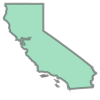

In [3]:
# The data in the states geomentry is a ploygon, of the shape of each individual state
states.iloc[24].geometry

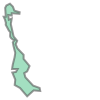

In [4]:
parks.iloc[5].geometry

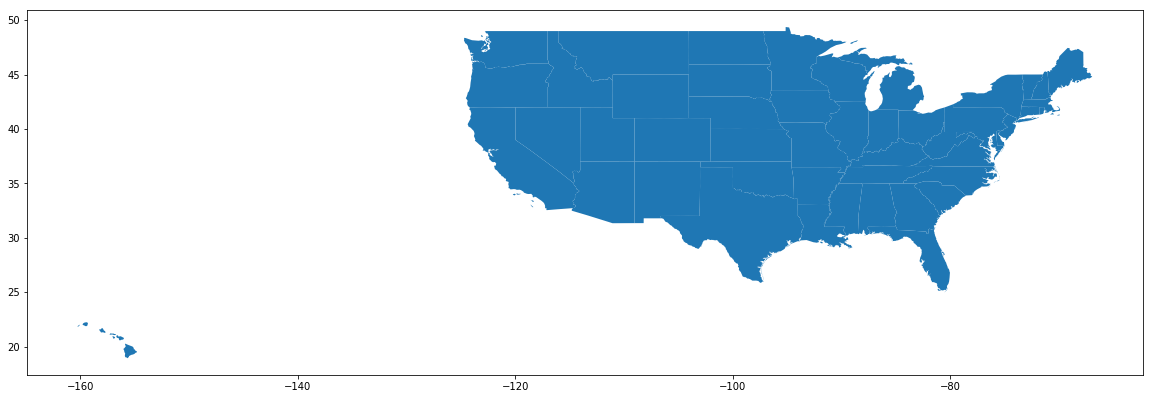

In [5]:
# Plot the states dataset
states.plot(figsize=(20,20))

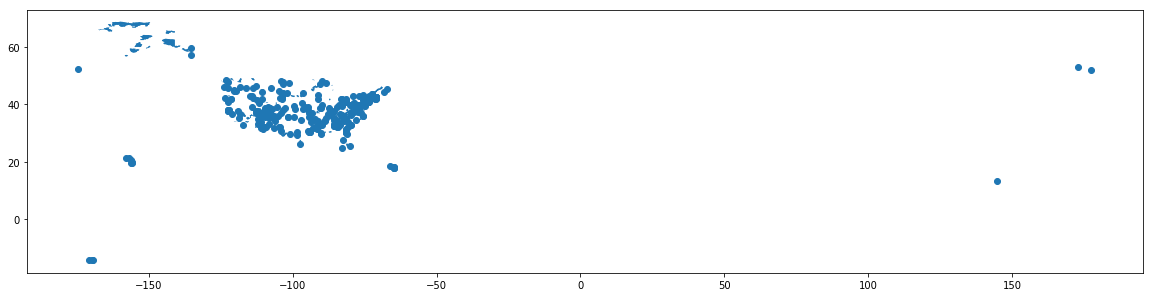

In [6]:
#Plot the parks dataset
parks.plot(figsize=(20,20))

#As we can see some of the parks exsists in area that are not repersented by our states map (namely Alska, puerto rico and other islands)

In [7]:
states.plot_bokeh(simplify_shapes=10000)

Figure(id='1003', ...)

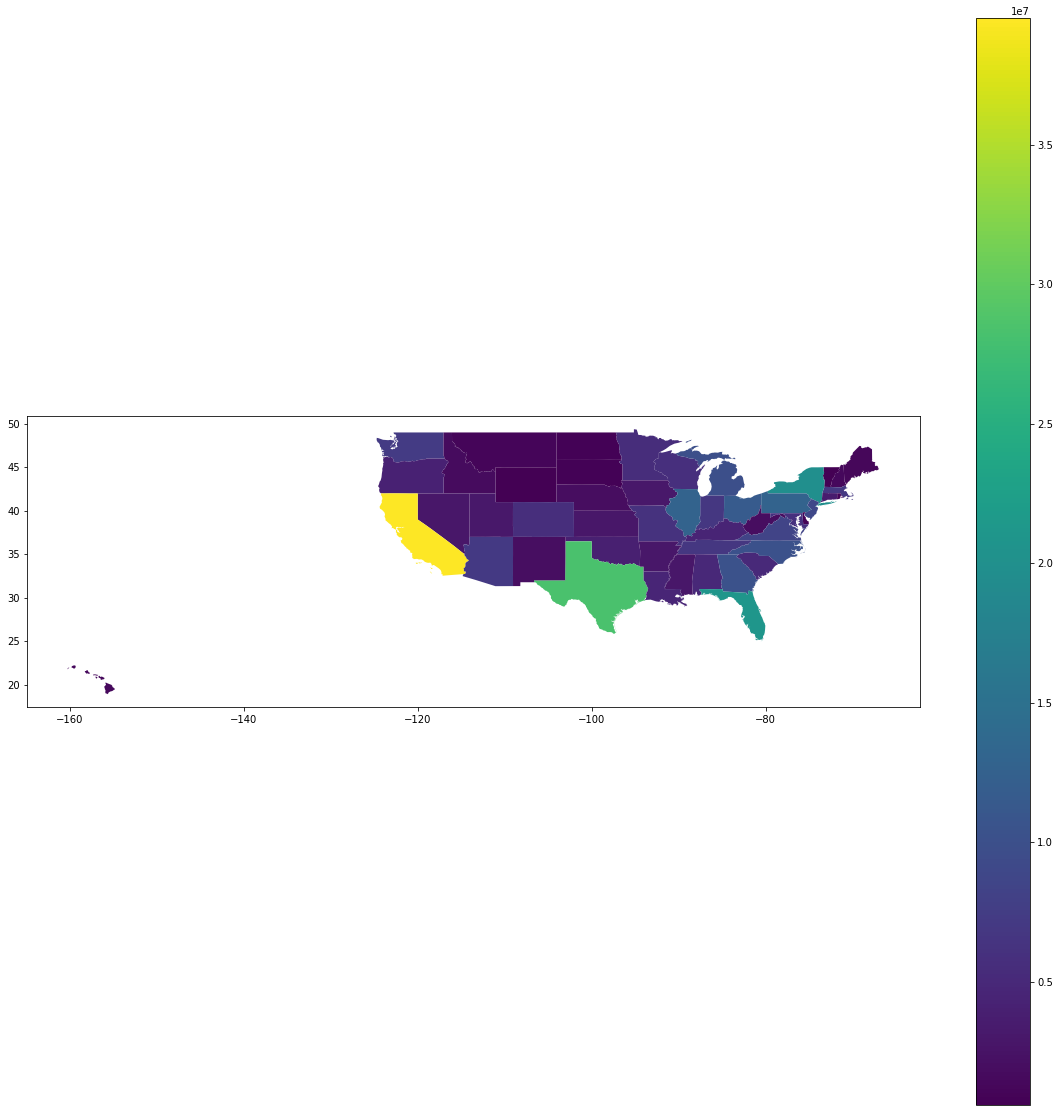

In [8]:
states.plot(column='POPESTIMATE2017', figsize=(20,20),legend=True)

# A map of the states by 2017 Population, geopandas makes it really easy to create choropleth maps (where the color is based on the value)
# However letting it make legends on its own is not so good an idea

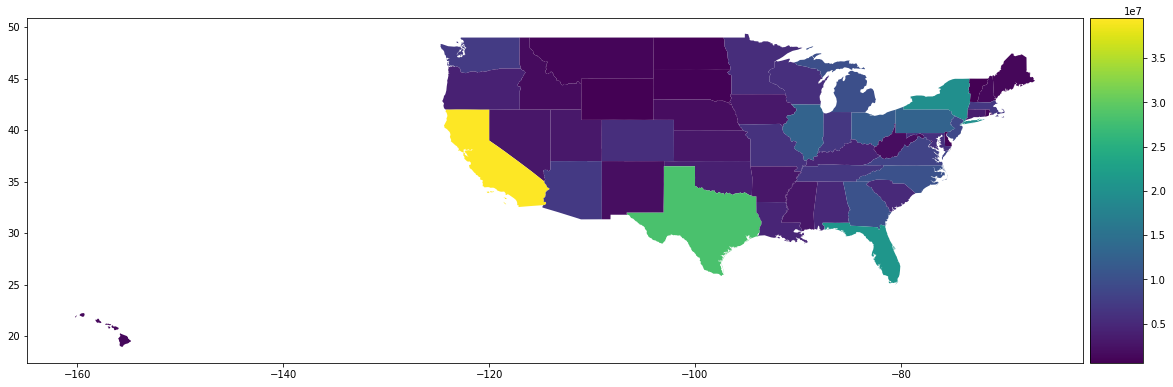

In [9]:
#But one that can be fixed using matplotlib.pyplot

fig, ax = plt.subplots(1, 1, figsize=(20,20))

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

states.plot(column='POPESTIMATE2017', ax=ax, legend=True, cax=cax)

In a Spatial Join, two geometry objects are merged based on their spatial relationship to one another. 
Using .sjoin we can merge the two.
sjoin.() has two core arguments: how and op.
The op argument specifies how geopandas decides whether or not to join the attributes of one object to another, it takes one of the following three agruments

intersects: The attributes will be joined if the boundary and interior of the object intersect in any way with the boundary and/or interior of the other object.

within: The attributes will be joined if the object’s boundary and interior intersect only with the interior of the other object (not its boundary or exterior).

contains: The attributes will be joined if the object’s interior contains the boundary and interior of the other object and their boundaries do not touch at all.

while the how argument specifies the type of join that will occur and which geometry is retained in the resultant geodataframe. It accepts the following options:

left: use the index from the first (or left_df) geodataframe that you provide to sjoin; retain only the left_df geometry column

right: use index from second (or right_df); retain only the right_df geometry column

inner: use intersection of index values from both geodataframes; retain only the left_df geometry column

In [11]:
US_parks = gpd.sjoin(parks, states, op='intersects') 

#Warning because the gemonetry of our two datasets arn't exactly the same
#Not a problem for us

In [12]:
US_parks.head()

featurecla                                           geometry  \
0    National Park Service  POLYGON ((-155.0587158203125 19.366943359375, ...   
128  National Park Service        POINT (-156.967559374083 21.19021230676486)   
129  National Park Service       POINT (-157.9624731110622 21.36867910363986)   
141  National Park Service       POINT (-155.8157852855413 20.02517324426486)   
344  National Park Service        POINT (-156.147002733458 20.70449453332736)   

                                                  name  note    nps_region  \
0                                    Hawai'i Volcanoes  None  Pacific West   
128                                      Kalaupapa NHP   NaN  Pacific West   
129  World War II Valor in the Pacific NM--Pearl Ha...   NaN  Pacific West   
141                               Pu'ukohola Heiau NHS   NaN  Pacific West   
344                                          Haleakala   NaN  Pacific West   

     scalerank unit_code                                          unit_name  \
0            3      HAVO                               Hawai'i Volcanoes NP   
128          8      KALA                                      Kalaupapa NHP   
129          8      VALR  World War II Valor in the Pacific NM--Pearl Ha...   
141          8      PUHE                               Pu'ukohola Heiau NHS   
344          7      HALE                                       Haleakala NP   

                    unit_type  index_right STATE_NAME  REGION  \
0               National Park            0     Hawaii       4   
128  National Historical Park            0     Hawaii       4   
129         National Monument            0     Hawaii       4   
141    National Historic Site            0     Hawaii       4   
344             National Park            0     Hawaii       4   

     POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  POPESTIMATE2013  \
0            1363817          1378323          1392772          1408038   
128          1363817          1378323          1392772          1408038   
129          1363817          1378323          1392772          1408038   
141          1363817          1378323          1392772          1408038   
344          1363817          1378323          1392772          1408038   

     POPESTIMATE2014  POPESTIMATE2015  POPESTIMATE2016  POPESTIMATE2017  
0            1417710          1426320          1428683          1427538  
128          1417710          1426320          1428683          1427538  
129          1417710          1426320          1428683          1427538  
141          1417710          1426320          1428683          1427538  
344          1417710          1426320          1428683          1427538

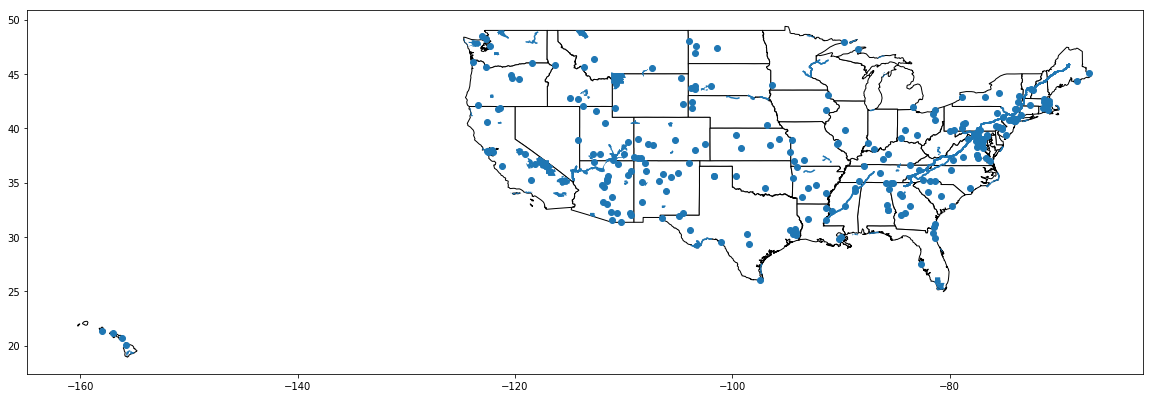

In [13]:
base = states.plot(color='white', edgecolor='black', figsize=(20,20))
graph = US_parks.plot(ax=base)


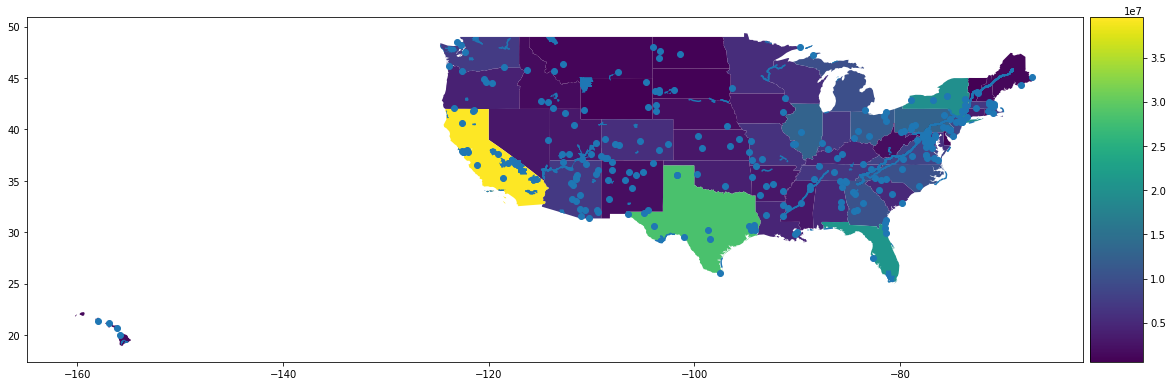

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(20,20))

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

base = states.plot(column='POPESTIMATE2017', ax=ax, legend=True, cax=cax)
US_parks.plot(ax=base)

Becasue we have joined the two datasets together, US_parks also has the ability to access Population data

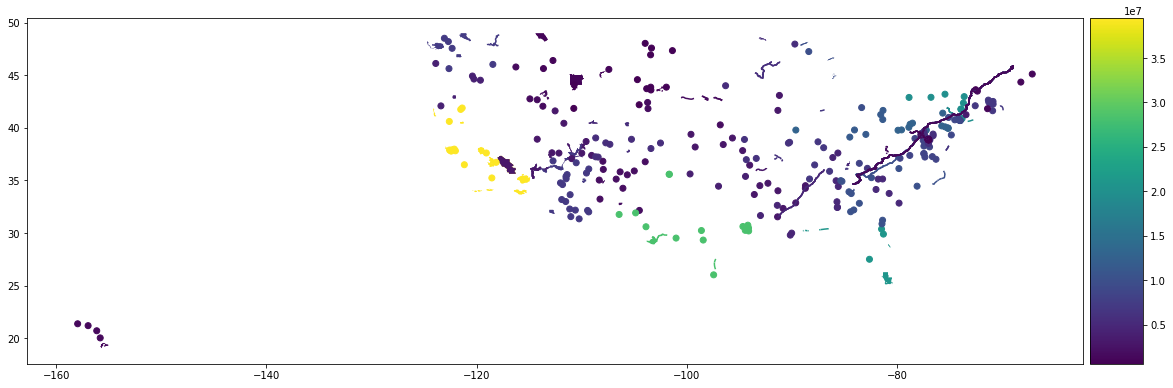

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(20,20))

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

US_parks.plot(ax=ax, column='POPESTIMATE2017', cax=cax, legend=True)

GeoDataFrames can be exported to many different standard formats using the GeoDataFrame.to_file() method

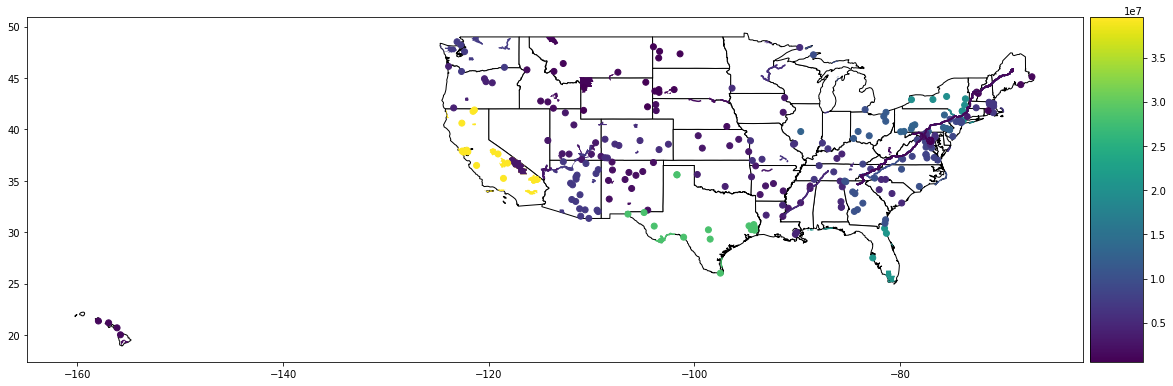

In [55]:
fig, ax = plt.subplots(figsize=(20,20))

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')
divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

states.plot(ax=ax, color='white', edgecolor='black')

US_parks.plot(ax=ax, column='POPESTIMATE2017', legend=True, cax=cax)

plt.show();

In [16]:
# A graph showing two different years worth of population 

states.plot_bokeh(
    figsize=(900, 600),
    simplify_shapes=5000,
    dropdown=["POPESTIMATE2010", "POPESTIMATE2017"],
    colormap="Viridis",
    hovertool_columns=["STATE_NAME", "POPESTIMATE2010", "POPESTIMATE2017"],
    tile_provider_url=r"http://c.tile.stamen.com/watercolor/{Z}/{X}/{Y}.jpg"
    )

Column(id='1207', ...)

In [17]:
#Calculate change of population relative to 2010:
for i in range(8):
    states["Delta_Population_201%d"%i] = ((states["POPESTIMATE201%d"%i] / states["POPESTIMATE2010"]) -1 ) * 100

#Specify slider columns:
slider_columns = ["Delta_Population_201%d"%i for i in range(8)]

#Specify slider-range (Maps "Delta_Population_2010" -> 2010, 
#                           "Delta_Population_2011" -> 2011, ...):
slider_range = range(2010, 2018)

#Make slider plot:
states.plot_bokeh(
    figsize=(900, 600),
    simplify_shapes=5000,
    slider=slider_columns,
    slider_range=slider_range,
    slider_name="Year", 
    colormap="Inferno",
    hovertool_columns=["STATE_NAME"] + slider_columns,
    title="Change of Population [%]")

Column(id='1365', ...)